<a href="https://colab.research.google.com/github/ldl23333/MAT494/blob/main/Homework2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 2.4

In [20]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)
N = 200
beta_0 = 1
beta_1 = 0.5
e_sd = 0.5
x = np.linspace(start = -10, stop = 10, num = N)
e = np.random.normal(loc = 0, scale = e_sd, size = len(x))
y = beta_0 + beta_1 * x + e
y_cond_exp = beta_0 + beta_1 * x
plot_at = [-5, 0, 5]

In [21]:
from scipy.stats import norm
def sideways_dnorm(where_x, where_y, e_var, magnify = 4):
    values = np.arange(start = -2, stop = 2.1, step = 0.1) 
    dens = norm.pdf(x = values, loc = 0, scale = np.sqrt(e_var))
    x = where_x + dens * np.array(magnify)
    y = where_y + values
    return(np.vstack((x, y)))

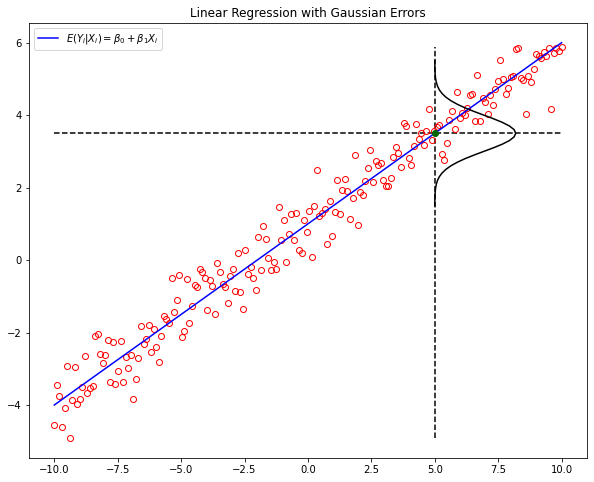

In [22]:
plt.figure(num = 4, figsize = (10, 8))
plt.plot(x, y, linestyle = "None", marker = "o", 
         color = "red", markerfacecolor = 'None')
plt.title("Linear Regression with Gaussian Errors")         
#plt.plot(x, y_mdl.fittedvalues, linestyle = "-", color = "blue")
plt.plot(x, y_cond_exp, linestyle = "-", color = "blue", 
        label = "$E(Y_i|X_i) = \\beta_0 + \\beta_1 X_i$")
for i in range(0, len(plot_at)):
    # y_fit = y_mdl.params[0] + y_mdl.params[1] * plot_at[i]
    y_fit = beta_0 + beta_1 * plot_at[i]
    xy = sideways_dnorm(where_x = plot_at[i],
                       where_y = y_fit,
                       e_var = e_sd**2,#np.var(y_mdl.resid),
                       magnify = 4)
plt.plot(xy[0], xy[1], linestyle = "-", color = "black")
plt.hlines(y = y_fit, linestyle = "--", 
               color = "black", xmin = min(x), xmax = max(x))
plt.vlines(x = plot_at[i], linestyle = "--", 
                color = "black", ymin = min(y), ymax = max(y))
plt.plot(plot_at[i], y_fit, linestyle = "None", 
             marker = "o", color = "darkgreen")
plt.legend()
plt.show()